In [1]:
%matplotlib inline
import pandas as pd #for datasets management
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
#el archivo debe estar en la misma dirección que el tester
db_original = 'EMPRESAS_MAS_GRANDES_DEL_PAIS.csv'
db = pd.read_csv(db_original)
db.head()

,ID,NIT,RAZON_SOCIAL,SUPERVISOR,REGION,DPTO,CIUDAD,CIIU,MACROSECTOR,INGRESOS_OPERACIONALES_2018,...,ACTIVOS_2018,PASIVOS_2018,PATRIMONIO_2018,INGRESOS_OPERACIONALES_2017,GANANCIA_2017,ACTIVOS_2017,PASIVOS_2017,PATRIMONIO_2017,NIIF,Unnamed: 20
0,1,899999068,ECOPETROL S.A,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,B0610 - Extracción de petróleo crudo,MINERO-HIDROCARBUROS,62579849000,...,1.137618e+11,5.654822e+10,5.721361e+10,4.968708e+10,6.620412e+09,1.075490e+11,5.965040e+10,4.789863e+10,NIIF PLENAS-GRUPO 1,NaN
1,2,830095213,ORGANIZACIÓN TERPEL S.A.,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,G4661 - Comercio al por mayor de combustibles ...,COMERCIO,14879440281,...,5.488096e+09,3.525498e+09,1.962597e+09,1.249326e+10,1.952812e+08,3.863475e+09,2.186212e+09,1.677263e+09,NIIF PLENAS-GRUPO 1,NaN
2,3,900112515,REFINERIA DE CARTAGENA S.A.S.,SUPERSOCIEDADES,Costa Atlántica,BOLIVAR,CARTAGENA-BOLIVAR,C1921 - Fabricación de productos de la refinac...,MANUFACTURA,12919431000,...,2.788179e+10,9.121544e+09,1.876025e+10,9.150339e+09,4.809466e+07,2.677963e+10,8.612363e+09,1.816726e+10,NIIF PLENAS-GRUPO 1,NaN
3,4,890900608,ALMACENES EXITO S A,SUPERFINANCIERA,Antioquia,ANTIOQUIA,ENVIGADO-ANTIOQUIA,G4711 - Comercio al por menor en establecimien...,COMERCIO,11444486000,...,1.566335e+10,8.013609e+09,7.649740e+09,1.125092e+10,2.177130e+08,1.596270e+10,8.123134e+09,7.839568e+09,NIIF PLENAS-GRUPO 1,NaN
4,5,890904996,EMPRESAS PÚBLICAS DE MEDELLÍN ESP,SUPERSERVICIOS,Antioquia,ANTIOQUIA,MEDELLIN-ANTIOQUIA,D3513- Dsitribución de energía electrica,SERVICIOS,8966811000,...,4.559554e+10,2.299022e+10,2.260532e+10,7.927149e+09,2.188189e+09,3.958096e+10,1.808298e+10,2.149798e+10,NIIF PLENAS-GRUPO 1,NaN


In [ ]:
print(db.dtypes) #tipos de datos en cada una de las columnas
print(db.shape) #cantidad de filas y columnas

In [14]:
pd.isnull(db).sum()

ID                               0
NIT                              0
RAZON_SOCIAL                     0
SUPERVISOR                       0
REGION                           0
DPTO                             0
CIUDAD                           0
CIIU                             0
MACROSECTOR                      0
INGRESOS_OPERACIONALES_2018      0
GANANCIA_2018                    0
ACTIVOS_2018                     0
PASIVOS_2018                     0
PATRIMONIO_2018                  0
INGRESOS_OPERACIONALES_2017      0
GANANCIA_2017                    0
ACTIVOS_2017                     0
PASIVOS_2017                     0
PATRIMONIO_2017                  0
NIIF                             0
Unnamed: 20                    979
dtype: int64

# Talk to me...

C:\Users\Luis\AppData\Local\Temp\ipykernel_8620\361865887.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(db.corr())


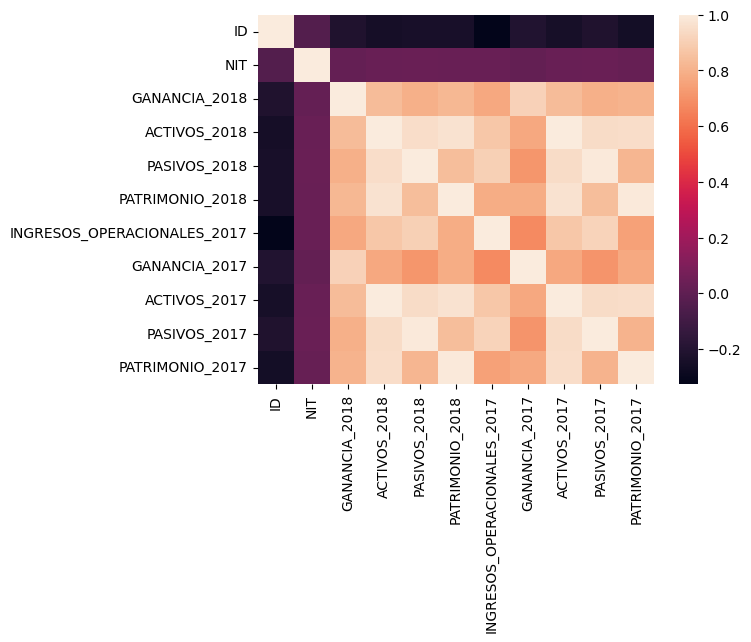

In [17]:
sns.heatmap(db.corr())
plt.show()

In [16]:
db.columns

Index(['ID', 'NIT', 'RAZON_SOCIAL', 'SUPERVISOR', 'REGION', 'DPTO_DOMICILIO',
       'CIUDAD_DOMICILIO', 'CIIU', 'MACROSECTOR',
       'INGRESOS_OPERACIONALES_2018', 'GANANCIA_2018', 'TOTAL_ACTIVOS_2018',
       'TOTAL_PASIVOS_2018', 'TOTAL_PATRIMONIO_2018',
       'INGRESOS_OPERACIONALES_2017', 'GANANCIA_2017', 'TOTAL_ACTIVOS_2017',
       'TOTAL_PASIVOS_2017', 'TOTAL_PATRIMONIO_2017', 'NIIF', 'Unnamed: 20'],
      dtype='object')

In [19]:
#print(db.corr()) #correlaciones entre TODAS las variables
print(db.corr()['INGRESOS_OPERACIONALES_2017']) #correlaciones entre variable determinada y todas las variables

ID                            -0.327316
NIT                            0.029563
GANANCIA_2018                  0.770727
ACTIVOS_2018                   0.873583
PASIVOS_2018                   0.905159
PATRIMONIO_2018                0.782844
INGRESOS_OPERACIONALES_2017    1.000000
GANANCIA_2017                  0.673454
ACTIVOS_2017                   0.873546
PASIVOS_2017                   0.915817
PATRIMONIO_2017                0.748905
Name: INGRESOS_OPERACIONALES_2017, dtype: float64


C:\Users\Luis\AppData\Local\Temp\ipykernel_8620\3358567898.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(db.corr()['INGRESOS_OPERACIONALES_2017']) #correlaciones entre variable determinada y todas las variables


In [18]:
corr = pearsonr(db['INGRESOS_OPERACIONALES_2017'], db['TOTAL_PASIVOS_2018']) #ingresos/patrimonio_17
print(corr)

PearsonRResult(statistic=0.9051594763361999, pvalue=0.0)
